In [85]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import kstest

import seaborn as sns

In [86]:
sns.set(style="whitegrid")

In [17]:
test_df = pd.read_csv('test_group.csv')

In [18]:
test_df = test_df[test_df['Date'] != '5.08.2019']

In [19]:
test_df

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
5,Test Campaign,6.08.2019,2458,42684,31489,7488,1854,1073,882,488
6,Test Campaign,7.08.2019,2838,53986,42148,4221,2733,2182,1301,890
7,Test Campaign,8.08.2019,2916,33669,20149,7184,2867,2194,1240,431
8,Test Campaign,9.08.2019,2652,45511,31598,8259,2899,2761,1200,845
9,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275
10,Test Campaign,11.08.2019,2420,83633,71286,3750,2893,2617,1075,668


In [20]:
control_df = pd.read_csv('control_group.csv')

In [21]:
control_df.dropna(inplace=True)

In [22]:
control_df

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
10,Control Campaign,11.08.2019,2490,115247.0,95843.0,8137.0,2941.0,2486.0,1887.0,475.0


In [23]:
test_df['Spend [USD]'].sum()

74595

In [24]:
control_df['Spend [USD]'].sum()

66818

Нельзя сказать, что распределение у данных из колонки 'Spend [USD]' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Impressions' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки 'Reach' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Website Clicks' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Searches' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of View Content' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Add to Cart' нормальное. pvalue = 0.0
Нельзя сказать, что распределение у данных из колонки '# of Purchase' нормальное. pvalue = 0.0


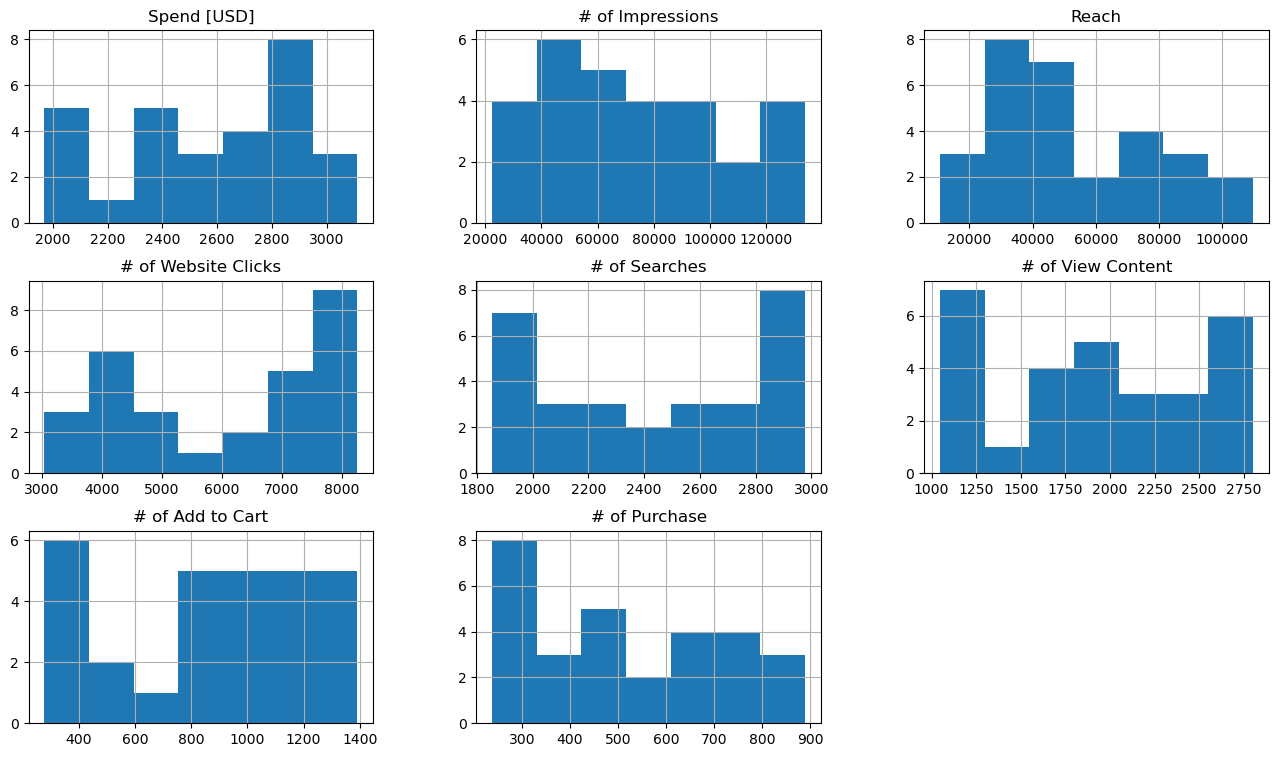

In [84]:
test_df.hist(figsize=(16,9), bins = 7)

def print_distribution_result(p_value, name):
    if p_value >= 0.001:
        print(f"Распределение данных в колонке '{name}' нормальное.", 'pvalue =',p_value)
    else:
        print(f"Нельзя сказать, что распределение у данных из колонки '{name}' нормальное.", 'pvalue =',p_value)
for colname in test_df.columns[2:]:
 
    p_value = kstest(test_df[colname], 'norm').pvalue
    print_distribution_result(p_value, colname)


Нельзя сказать, что распределение у данных из колонки 'Spend [USD]' нормальное. pvalue = 0.0


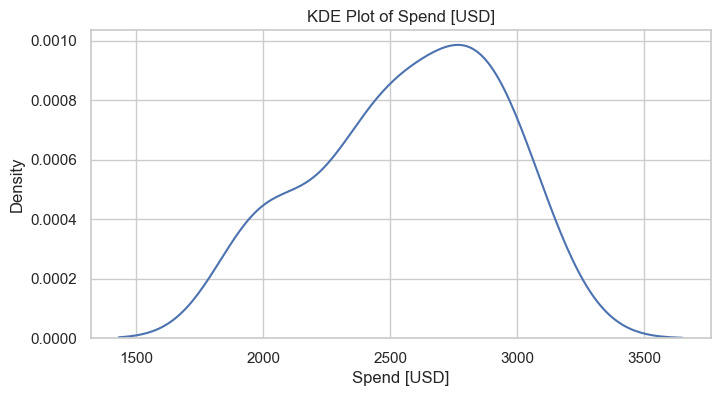

Нельзя сказать, что распределение у данных из колонки '# of Impressions' нормальное. pvalue = 0.0


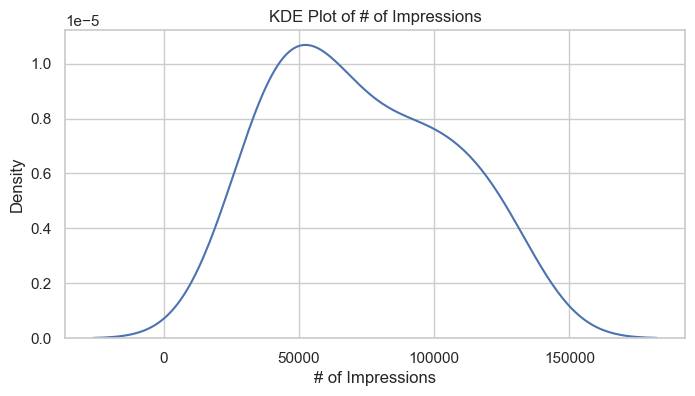

Нельзя сказать, что распределение у данных из колонки 'Reach' нормальное. pvalue = 0.0


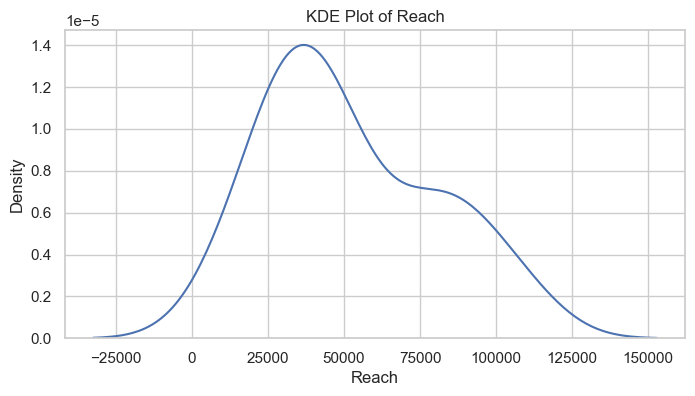

Нельзя сказать, что распределение у данных из колонки '# of Website Clicks' нормальное. pvalue = 0.0


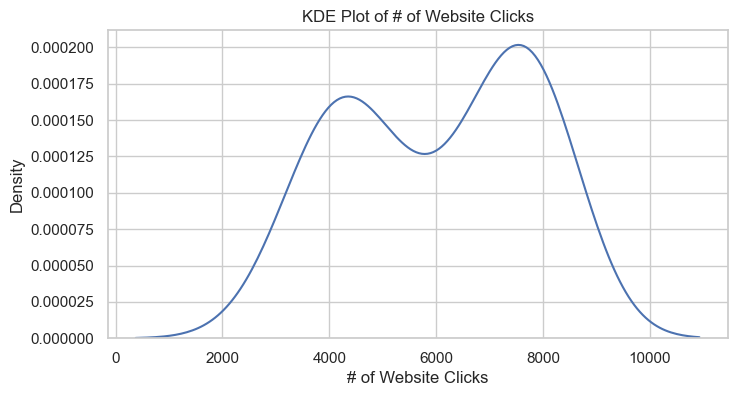

Нельзя сказать, что распределение у данных из колонки '# of Searches' нормальное. pvalue = 0.0


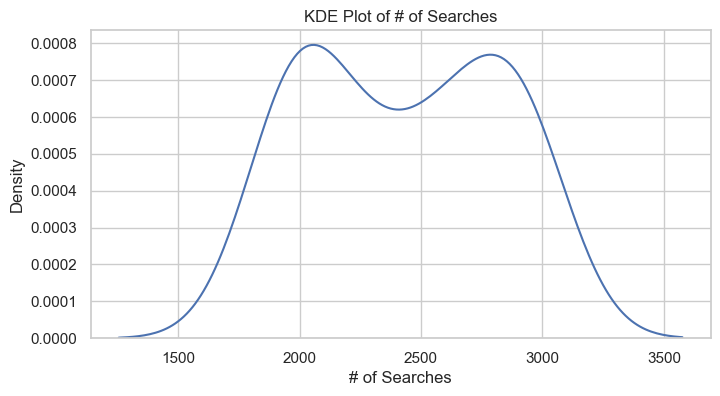

Нельзя сказать, что распределение у данных из колонки '# of View Content' нормальное. pvalue = 0.0


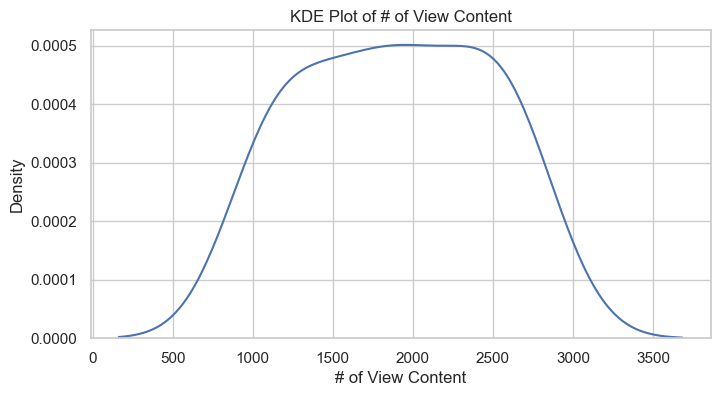

Нельзя сказать, что распределение у данных из колонки '# of Add to Cart' нормальное. pvalue = 0.0


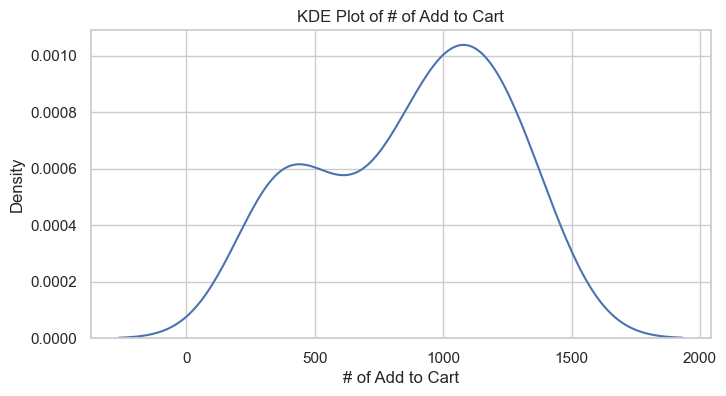

Нельзя сказать, что распределение у данных из колонки '# of Purchase' нормальное. pvalue = 0.0


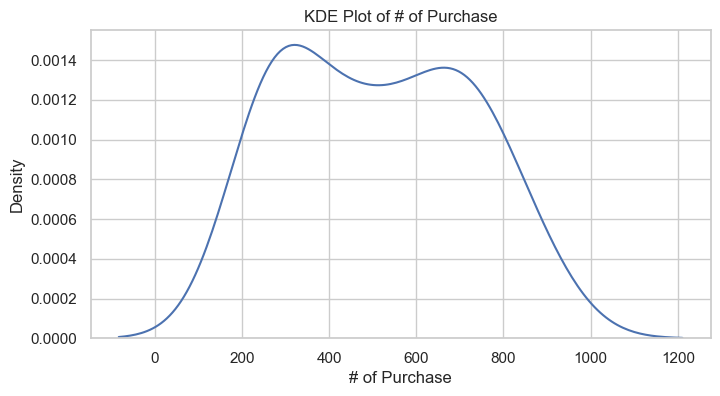

In [100]:
def print_distribution_result(p_value, name):
    if p_value > 0.01:
        print(f"Распределение данных в колонке '{name}' нормальное.", 'pvalue =',p_value)
    else:
        print(f"Нельзя сказать, что распределение у данных из колонки '{name}' нормальное.", 'pvalue =',p_value)
for colname in test_df.columns[2:]:
 
    p_value = kstest(test_df[colname], 'norm').pvalue
    print_distribution_result(p_value, colname)

    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=test_df[colname])
    plt.title(f'KDE Plot of {colname}')
    plt.xlabel(colname)
    plt.ylabel('Density')
    plt.show()



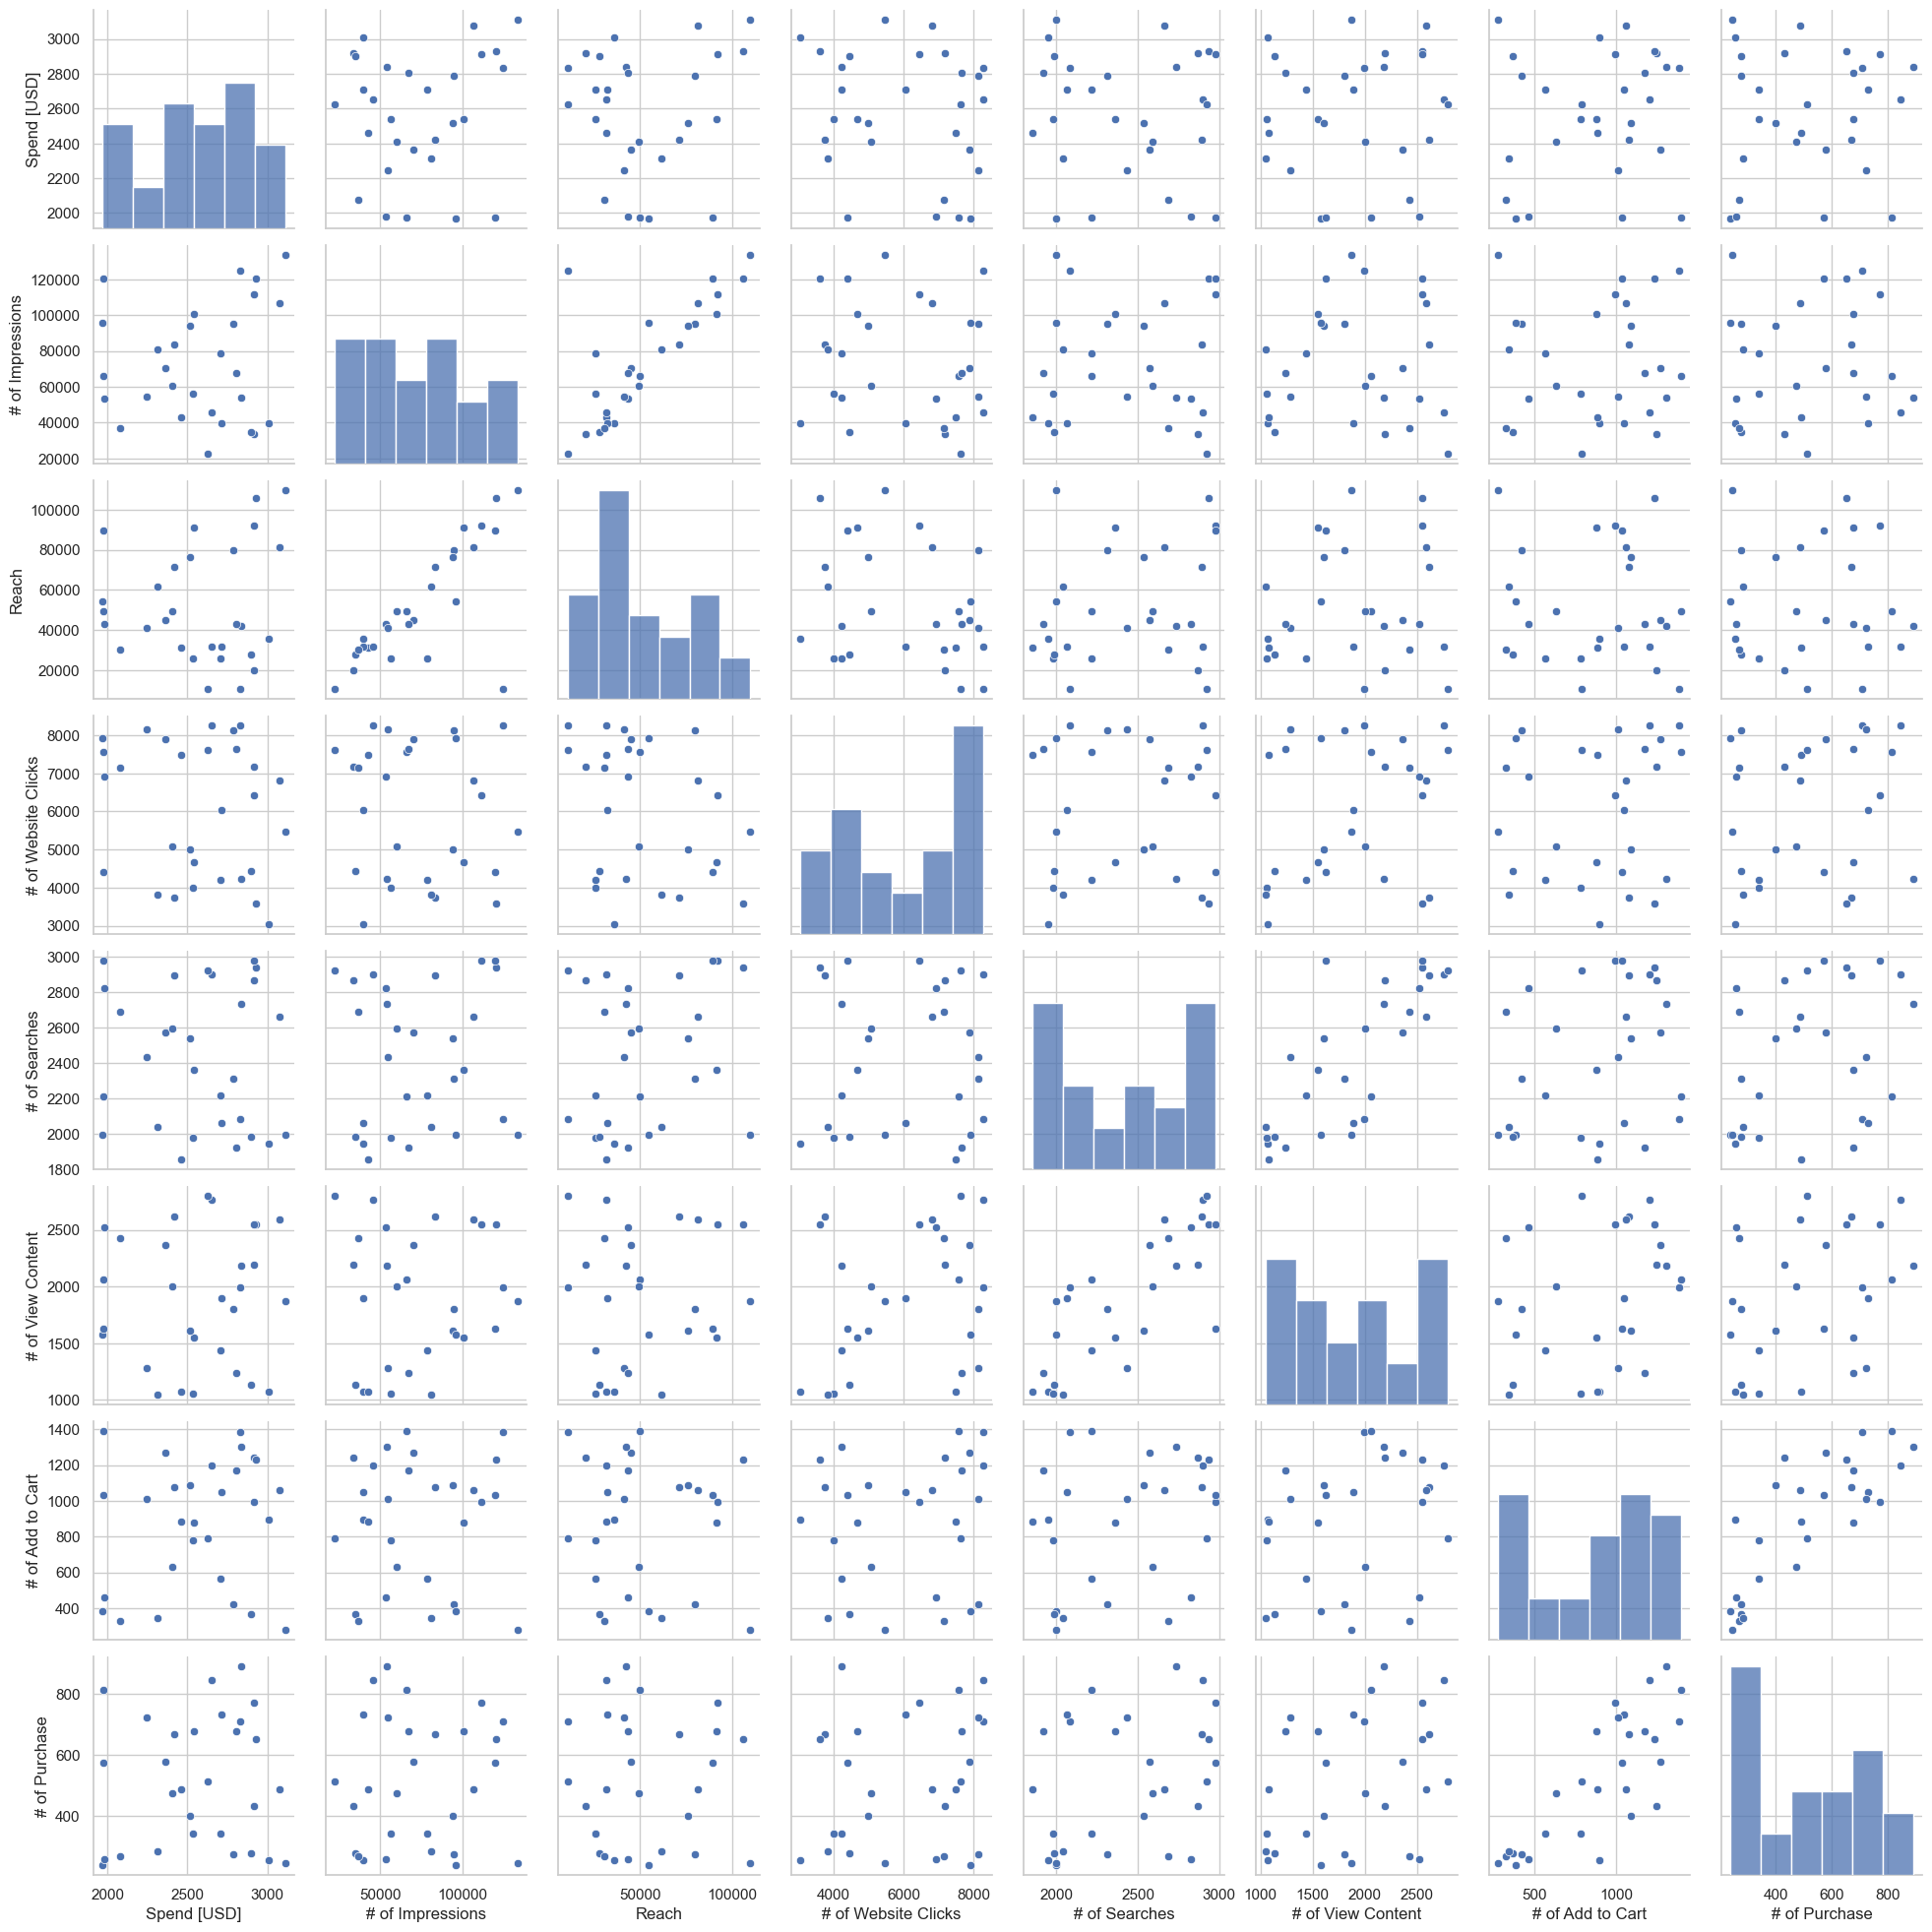

In [102]:
sns.pairplot(test_df)

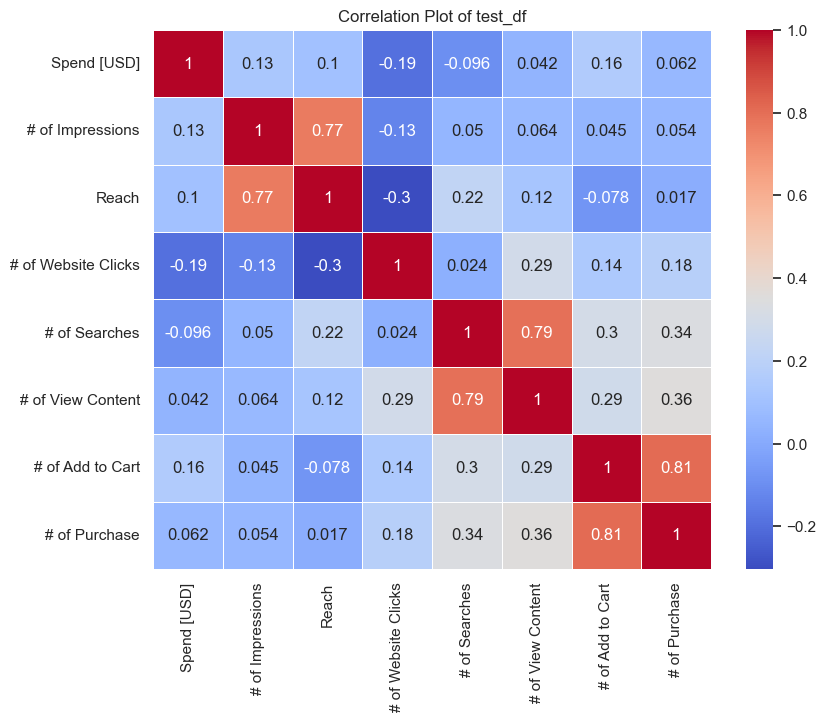

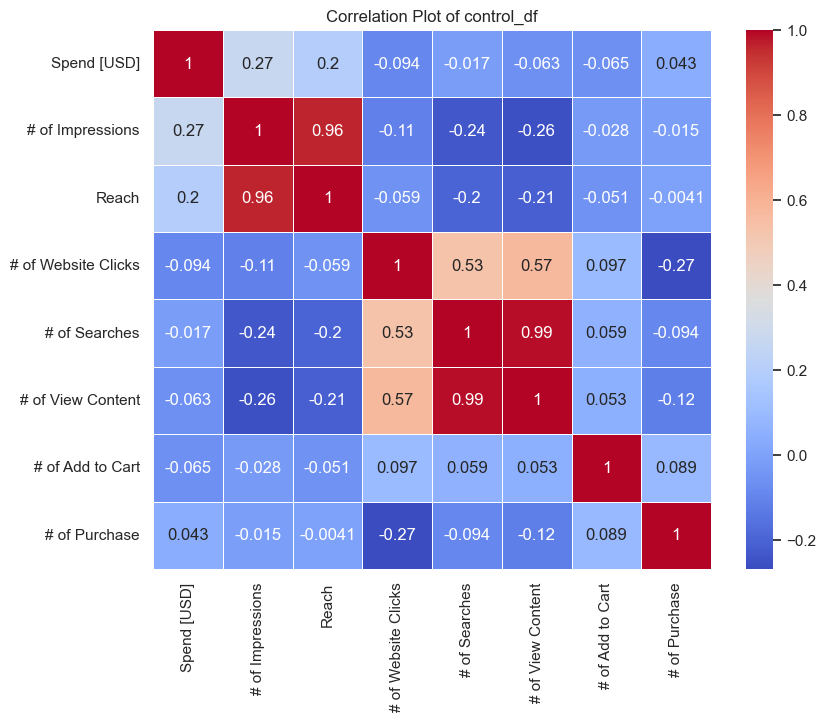

In [129]:
correlation_matrix = test_df.iloc[:,2:].corr(numeric_only=False)

plt.figure(figsize=(9, 7))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)

plt.title('Correlation Plot of test_df')
plt.show()



correlation_matrix = control_df.iloc[:,2:].corr(numeric_only=False)

plt.figure(figsize=(9, 7))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)

plt.title('Correlation Plot of control_df')
plt.show()
